In [1]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/admin/OneDrive/dl with python/Bike and Car/Train'
valid_path = 'C:/Users/admin/OneDrive/dl with python/Bike and Car/Test'

In [4]:
# Load pre-trained VGG19 model
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [23]:
 # useful for getting number of classes
folders = glob('C:/Users/admin/OneDrive/dl with python/Bike and Car/Train*')


In [24]:
folders

['C:/Users/admin/OneDrive/dl with python/Bike and Car\\Train']

In [25]:
len(folders)

1

In [10]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg19.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)


# create a model object

In [11]:
model=Model(inputs=vgg19.input,outputs=prediction)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
#to perform image augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/admin/OneDrive/dl with python/Bike and Car/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
print('='*100)

#Testing set
print('Test length:\n')

test_set=test_datagen.flow_from_directory('C:/Users/admin/OneDrive/dl with python/Bike and Car/Test'
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Training length:

Found 508 images belonging to 2 classes.
Test length:

Found 253 images belonging to 2 classes.


# Train the model


In [17]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=30,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))


Epoch 1/30
16/16 [==============================] - 112s 7s/step - loss: 0.2610 - accuracy: 0.8996 - val_loss: 0.3053 - val_accuracy: 0.9091
Epoch 2/30
16/16 [==============================] - 123s 8s/step - loss: 0.0783 - accuracy: 0.9685 - val_loss: 0.0775 - val_accuracy: 0.9644
Epoch 3/30
16/16 [==============================] - 129s 8s/step - loss: 0.0394 - accuracy: 0.9862 - val_loss: 0.0491 - val_accuracy: 0.9802
Epoch 4/30
16/16 [==============================] - 139s 9s/step - loss: 0.0307 - accuracy: 0.9921 - val_loss: 0.0739 - val_accuracy: 0.9605
Epoch 5/30
16/16 [==============================] - 133s 8s/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0442 - val_accuracy: 0.9763
Epoch 6/30
16/16 [==============================] - 129s 8s/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 0.0585 - val_accuracy: 0.9684
Epoch 7/30
16/16 [==============================] - 127s 8s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9842
Epoch 8/30
16

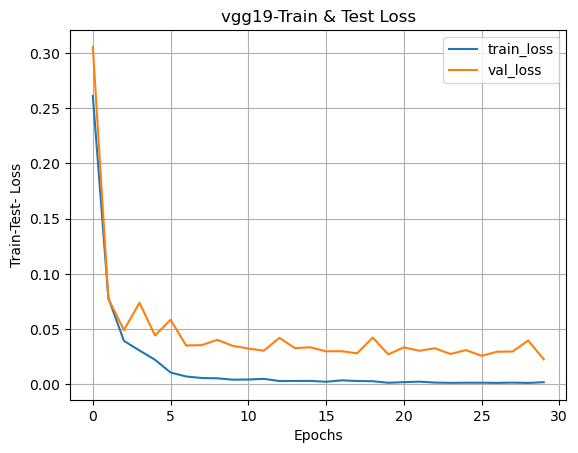

<Figure size 640x480 with 0 Axes>

In [18]:
#loss
plt.title('vgg19-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Loss & Val_loss')

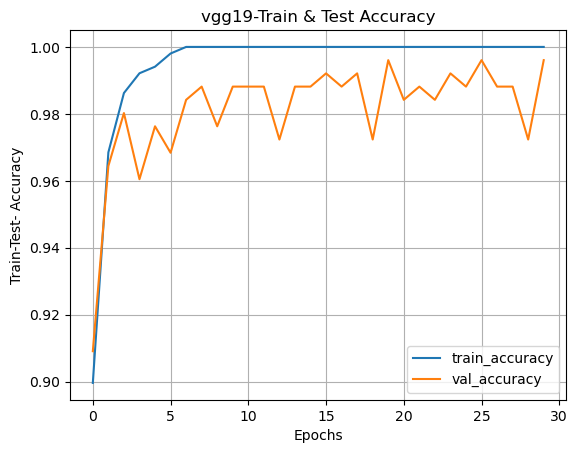

<Figure size 640x480 with 0 Axes>

In [19]:
#Accuracy
plt.title('vgg19-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Accuracy & Val_accuracy')

In [22]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg19_bike vs car.h5')

In [23]:
model.save('vgg19_bike vs car.keras')

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['Bike','Car']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

8/8 [==============================] - 33s 4s/step
Confusion Matrix
[[73 66]
 [65 49]]
Classification Report
              precision    recall  f1-score   support

        Bike       0.53      0.53      0.53       139
         Car       0.43      0.43      0.43       114

    accuracy                           0.48       253
   macro avg       0.48      0.48      0.48       253
weighted avg       0.48      0.48      0.48       253

Accuracy Score
0.48221343873517786


<Axes: >

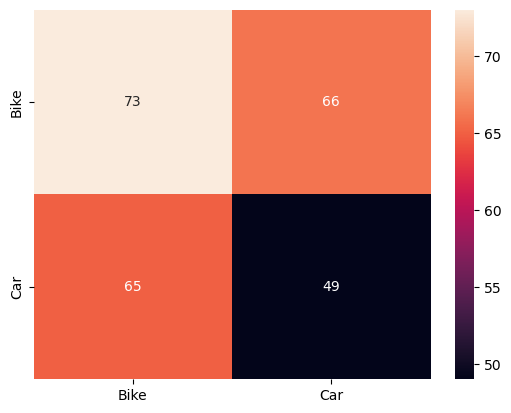

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['Bike','Car'],
 yticklabels=['Bike','Car'])

# Multiclass

In [12]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear/Train*'
valid_path = 'C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear/Test*'

In [18]:
#add preprocessing layer to the front ofmobilenet
mobilenet= MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#don't train existing weights 
for layer in mobilenet.layers: 
    layer.trainable =False

In [19]:
# useful for getting number of classes
folders = glob('C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear/Train*')

In [20]:
folders

['C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear\\Train']

In [21]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [33]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [34]:
# tell the model what cost and optimization method to use
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [35]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear/Train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/admin/OneDrive/dl with python/Footwear (1)/Footwear/Test',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 474 images belonging to 3 classes.
Found 509 images belonging to 3 classes.


In [36]:
# Fit the model
r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
15/15 [==============================] - 16s 903ms/step - loss: 9.9325 - accuracy: 0.3333 - val_loss: 4.5898 - val_accuracy: 0.3222
Epoch 2/10
15/15 [==============================] - 12s 800ms/step - loss: 6.5921 - accuracy: 0.3059 - val_loss: 4.1219 - val_accuracy: 0.3202
Epoch 3/10
15/15 [==============================] - 12s 776ms/step - loss: 7.3549 - accuracy: 0.3186 - val_loss: 7.1698 - val_accuracy: 0.4303
Epoch 4/10
15/15 [==============================] - 11s 749ms/step - loss: 7.8606 - accuracy: 0.3207 - val_loss: 5.1538 - val_accuracy: 0.2809
Epoch 5/10
15/15 [==============================] - 11s 741ms/step - loss: 6.3332 - accuracy: 0.3270 - val_loss: 6.8678 - val_accuracy: 0.3045
Epoch 6/10
15/15 [==============================] - 11s 719ms/step - loss: 6.5960 - accuracy: 0.2975 - val_loss: 8.0484 - val_accuracy: 0.2397
Epoch 7/10
15/15 [==============================] - 11s 741ms/step - loss: 7.9952 - accuracy: 0.2848 - val_loss: 7.9046 - val_accuracy: 0.2613

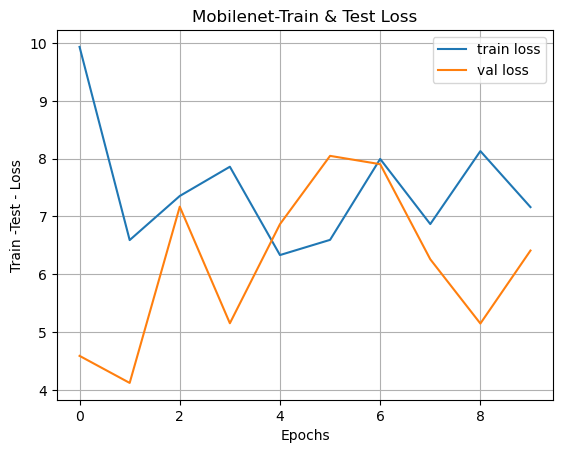

<Figure size 640x480 with 0 Axes>

In [37]:
# loss
plt.title('Mobilenet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--LossVal_loss')

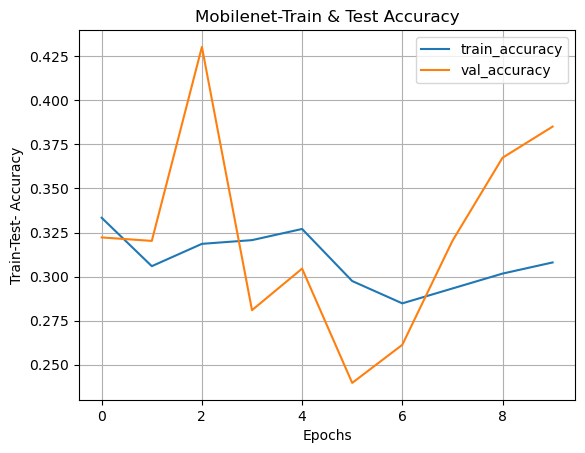

<Figure size 640x480 with 0 Axes>

In [38]:
#Accuracy
plt.title('Mobilenet-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--Accuracy & Val_accuracy')

In [41]:
import tensorflow as tf
from keras.models import load_model
model.save('Mobilenet_Footwear.h5')

In [42]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set, 100 // 5)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Boot', 'Sandal', 'Shoe']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

<Axes: >

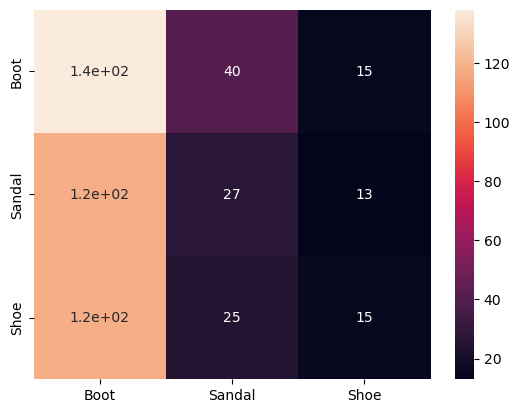

In [50]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['Boot', 'Sandal', 'Shoe'],
yticklabels=['Boot', 'Sandal', 'Shoe'])